# Python Assignment 6

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [2]:
# PART 2 (Modified)
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])  # Training features
    Y_train = np.array(train_dataset["train_set_y"][:])  # Training labels

    return X_train, Y_train

X_train, Y_train = load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and normalize
Y_train = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
X_train = torch.tensor(X_train, dtype=torch.float32)

# Split the dataset into new training and test sets
new_X_train = X_train[:160]
new_Y_train = Y_train[:160]
new_X_test = X_train[160:]
new_Y_test = Y_train[160:]


In [3]:
# Define the neural network model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [4]:
# Initialize the model
model = BinaryClassifier(new_X_train.shape[1])

# Initialize the loss function
criterion = nn.BCELoss()

# Create an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(new_X_train)
    loss = criterion(predictions, new_Y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item()}")


Epoch 0/1000 - Loss: 0.651747465133667
Epoch 100/1000 - Loss: 0.6514922380447388
Epoch 200/1000 - Loss: 0.6513561010360718
Epoch 300/1000 - Loss: 0.6512875556945801
Epoch 400/1000 - Loss: 0.6512548327445984
Epoch 500/1000 - Loss: 0.6512401103973389
Epoch 600/1000 - Loss: 0.6512338519096375
Epoch 700/1000 - Loss: 0.6512314677238464
Epoch 800/1000 - Loss: 0.6512304544448853
Epoch 900/1000 - Loss: 0.6512301564216614
Epoch 999/1000 - Loss: 0.6512300372123718


In [9]:
# Evaluate on the new test set
with torch.no_grad():
    new_test_predictions = model(new_X_test)
    new_test_predictions_binary = (new_test_predictions >= 0.5).float()
    new_test_accuracy = (new_test_predictions_binary == new_Y_test).float().mean().item()
    print(f"New Test Accuracy: {new_test_accuracy * 100:.2f}%")

New Test Accuracy: 69.39%


New Misclassified indices: [2, 4, 6, 9, 10, 11, 14, 15, 17, 19, 25, 28, 32, 37, 40]


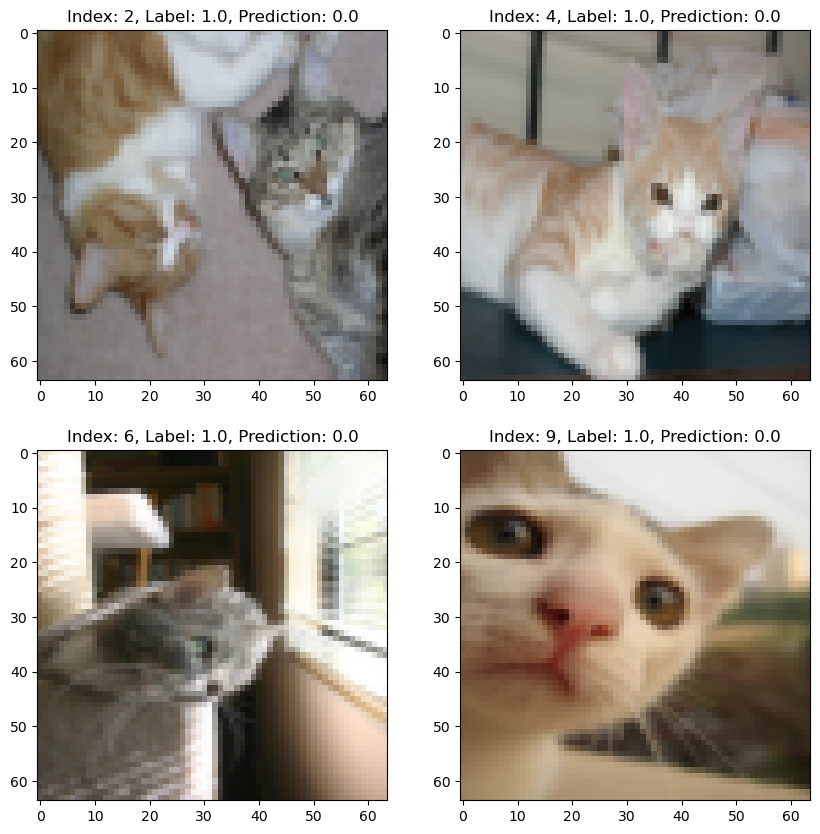

In [10]:
# Identify misclassified examples
new_misclassified_indices = [i for i in range(len(new_Y_test)) if new_test_predictions_binary[i] != new_Y_test[i]]
print("New Misclassified indices:", new_misclassified_indices)

# Display 4 misclassified examples
plt.figure(figsize=(10, 10))
for i, idx in enumerate(new_misclassified_indices[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(new_X_test[idx].reshape(64, 64, 3).numpy())
    plt.title(f"Index: {idx}, Label: {new_Y_test[idx].item()}, Prediction: {new_test_predictions_binary[idx].item()}")
plt.show()